# Deconvolutional Filtering of a SiPM Signal in CCRYSP

## Data initialization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
d1 = "sipm1data0.csv"
d2 = "sipm2data0.csv"

si1 = np.loadtxt(d1, delimiter = ",")
#print(si1)
si2 = np.loadtxt(d2, delimiter = ",")
si2 = si2/8e-4
si2 = si2.astype(int)
tbase = np.loadtxt("tbase.csv", delimiter = ",")
ev = 4

## Convolutional (Simulation) Part

### Definition of Convolutional Signal model

In [2]:
#def rgauss(t, T1, sig1):
#    return 1/(np.sqrt(2 * np.pi) * sig1) * np.exp(-(t-T1)**2/(2*sig1**2))
#def rexp(t, t0):
#    return np.heaviside(t, 1) / t0 * np.exp(-t/t0)#

#def convo(t, T1, sig1, t0, T2, sig2, tRC):
#    return np.convolve(np.convolve(np.convolve(rgauss(t, T1, sig1), rexp(t, t0), 'same'), rgauss(t, T2, sig2), 'same'), rexp(t, tRC), 'same')

def h(t, t0, tRC):
    a = 1/(t0-tRC)*(np.exp(-t/t0)-np.exp(-t/tRC))
    n = a > 0
    return a * n
def x(t, T1, sig1, T2, sig2):
    return np.exp(-(t-(T1+T2))**2/(2*(sig1**2 + sig2**2)))
def convo(t, T1, sig1, t0, T2, sig2, tRC):
    return np.convolve(h(t, t0, tRC), x(t, T1, sig1, T2, sig2), 'same')

## Util for matplot
def align_yaxis(ax1, v1, ax2, v2):
    """adjust ax2 ylimit so that v2 in ax2 is aligned to v1 in ax1"""
    _, y1 = ax1.transData.transform((0, v1))
    _, y2 = ax2.transData.transform((0, v2))
    inv = ax2.transData.inverted()
    _, dy = inv.transform((0, 0)) - inv.transform((0, y1-y2))
    miny, maxy = ax2.get_ylim()
    ax2.set_ylim(miny+dy, maxy+dy)

### Fitting example pulses

Fitting the convolutional signal model to existing data, the values which were obtained are 
$$t_0 = 747.4 \text{ ns}, \:\: t_\text{RC} = 23.0 \text{ ns} $$

9.127e-06 7.120e-07 2.510e-08


C:\Users\jan\AppData\Local\Temp\ipykernel_14564\2109659974.py:10: RuntimeWarning: overflow encountered in exp
  a = 1/(t0-tRC)*(np.exp(-t/t0)-np.exp(-t/tRC))
C:\Users\jan\AppData\Local\Temp\ipykernel_14564\2109659974.py:10: RuntimeWarning: overflow encountered in multiply
  a = 1/(t0-tRC)*(np.exp(-t/t0)-np.exp(-t/tRC))
C:\Users\jan\AppData\Local\Temp\ipykernel_14564\2109659974.py:12: RuntimeWarning: invalid value encountered in multiply
  return a * n


5.744e-06 6.346e-07 6.503e-09
2.779e-05 8.493e-07 2.537e-08
4.132e-05 7.792e-07 3.210e-08
2.778e-05 8.570e-07 2.327e-08
1.414e-05 7.107e-07 1.700e-08
3.251e-05 7.239e-07 4.103e-08
7.980e-06 6.334e-07 1.966e-08
7.800e-06 6.087e-07 2.388e-08
1.418e-05 7.966e-07 3.014e-08
6.241e-05 8.211e-07 2.509e-08
5.781e-05 7.419e-07 3.429e-08
2.923e-05 8.104e-07 3.745e-08
6.162e-06 9.643e-07 1.006e-09
2.444e-05 7.627e-07 2.421e-08
3.052e-05 7.734e-07 1.006e-09
2.647e-05 8.307e-07 3.237e-08
1.778e-05 7.174e-07 3.801e-08
2.194e-05 7.467e-07 3.468e-08
9.227e-06 9.066e-07 1.039e-08
4.251e-05 8.324e-07 2.874e-08
5.304e-06 8.250e-07 1.006e-09
1.712e-05 8.338e-07 2.544e-08
2.705e-05 7.936e-07 2.024e-08
2.781e-05 8.053e-07 3.505e-08
2.121e-05 7.588e-07 3.460e-08
3.949e-05 7.606e-07 3.695e-08
1.421e-05 7.857e-07 3.171e-08
4.502e-05 8.105e-07 3.596e-08
1.721e-05 7.450e-07 2.914e-08
Time constants t0 and tRC are 7.777e-07 / 2.538e-08


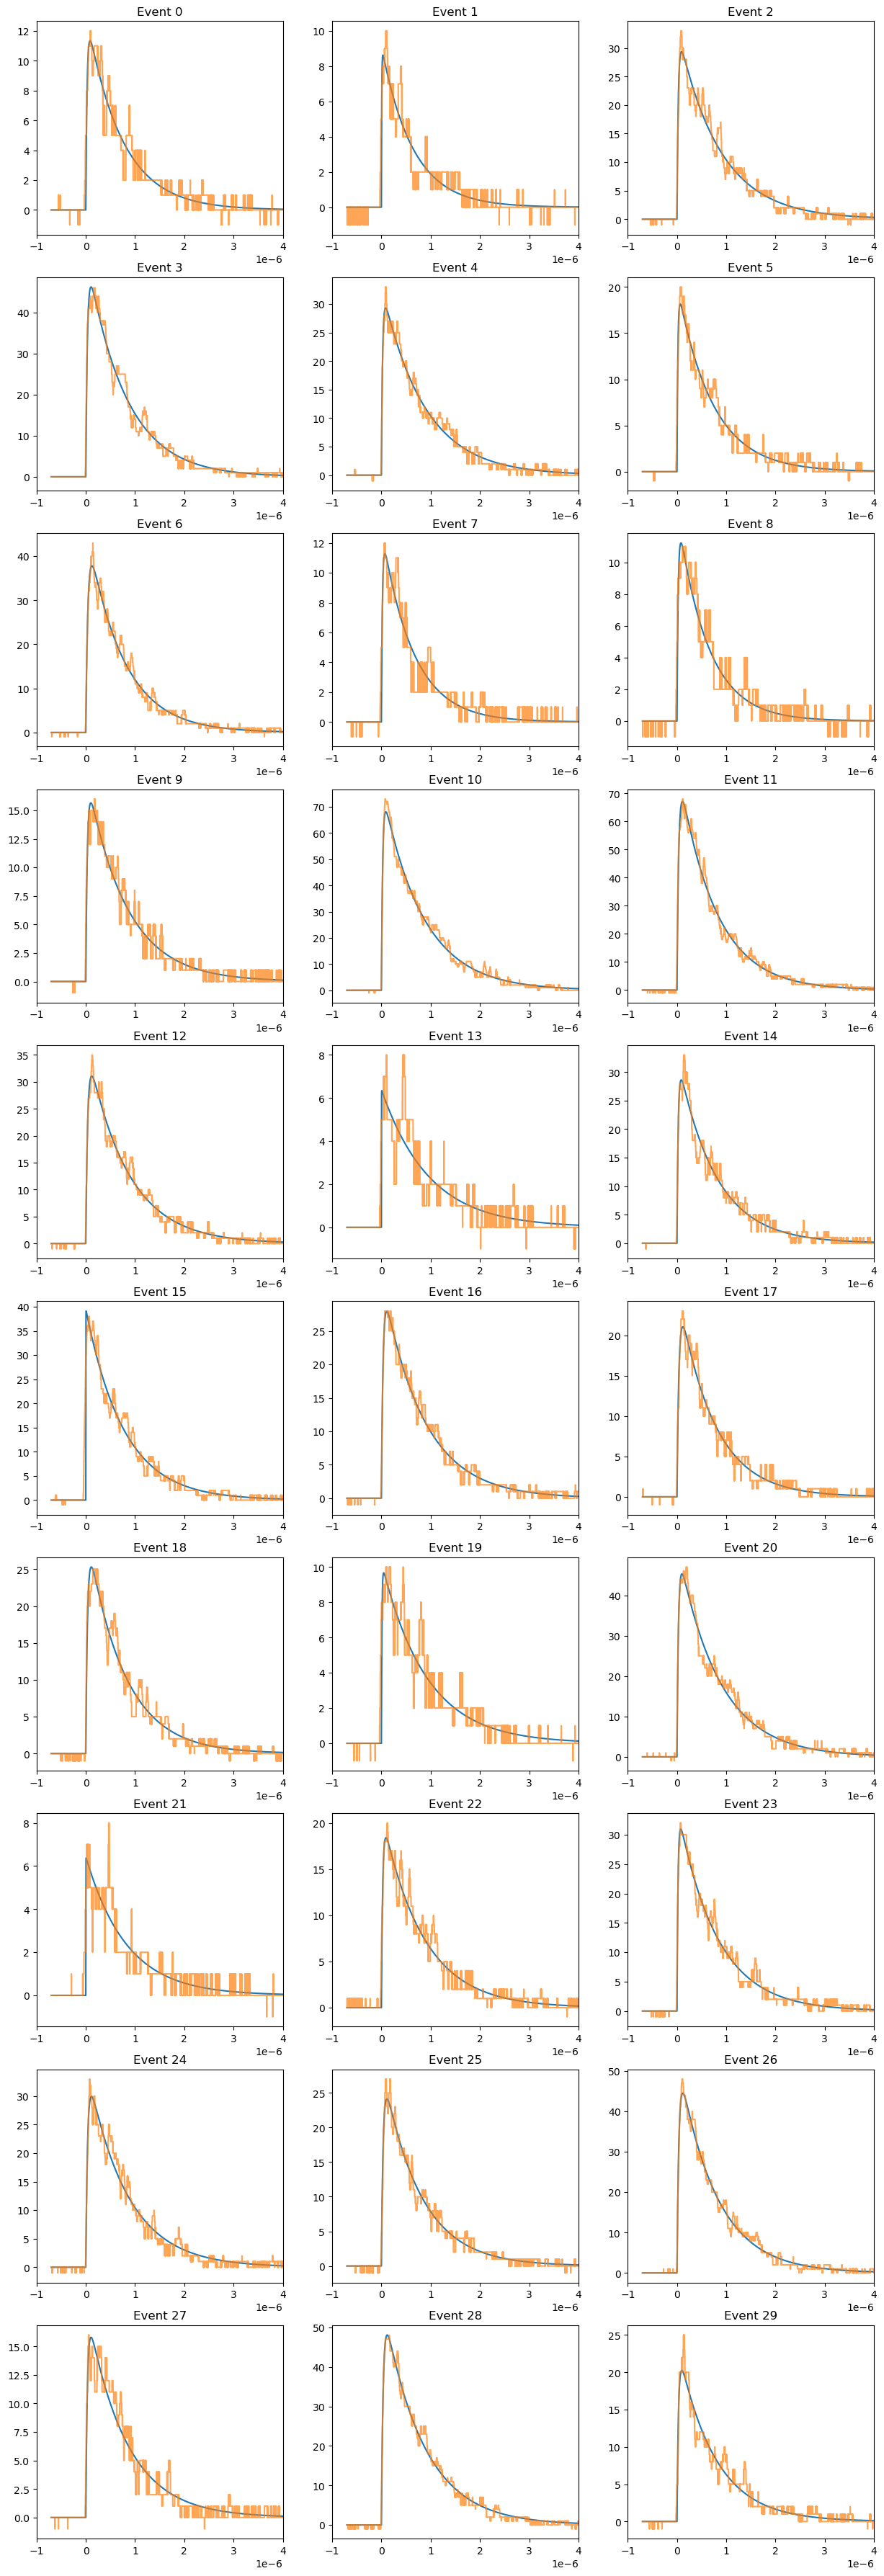

In [34]:
#OBTAINING time constants through multiple fits of pulses
from scipy.optimize import curve_fit
t0litarr = np.array([])
tRClitarr = np.array([])

def j(t, A, t0, tRC):
    return h(t, t0, tRC) * A



#d1 = "sipm1data0.csv"  
#si2 = np.loadtxt(d2, delimiter = ",")
#si2 = si2/8e-4
#si2 = si2.astype(int)
#tbase = np.loadtxt("tbase.csv", delimiter = ",")
n = 0
m = 30
plt.figure(figsize = (15, 5*int((m-n)/3)))
for ev in range(n, m):
#plt.subplot(211)
#plt.plot(tbase, si2[ev]/np.max(np.abs(si2[ev])), label = "SiPM 2 Hit Nr " + str(ev))
#plt.plot(tbase, deconv(si2[ev], Ts)/np.max(np.abs(deconv(si2[ev], Ts)))*0.2, alpha = 0.5, label = "Deconv Signal (scaled for visibility)")
#plt.subplot(212)
    plt.subplot(int((m-n)/3)+1, 3, ev-n+1)
    popt, pcov = curve_fit(j, tbase, si2[ev], p0 = (0.001, 200e-9, 0.1e-6))
    #plt.plot(tbase, j(tbase, popt[0], popt[1], popt[2]))
    plt.plot(tbase, si2[ev], alpha = 0.7)
    plt.title("Event "+ str(ev))
    t0litarr = np.append(t0litarr, popt[1])
    tRClitarr = np.append(tRClitarr, popt[2])
    plt.xlim(-1e-6, 4e-6)
    print('{:0.3e}'.format(popt[0]), '{:0.3e}'.format(popt[1]), '{:0.3e}'.format(popt[2]))
t0lit = np.mean(t0litarr)
tRClit = np.mean(tRClitarr)
print("Time constants t0 and tRC are", '{:0.3e}'.format(t0lit), "/", '{:0.3e}'.format(tRClit))
plt.savefig(d1[0:-3]+".pdf")
plt.show()

1.400e-03 7.851e-07 3.675e-08


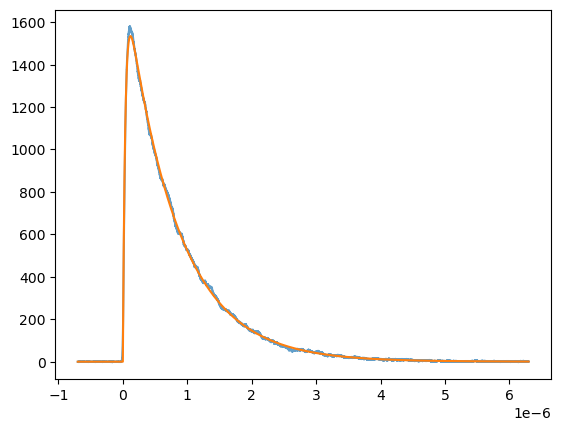

In [35]:
### Selected "clean" pulses averaged
ind = np.array([4, 10, 26, 28, 35, 39, 44, 52, 57, 69, 70, 73, 75, 76, 80, 81, 84, 88, 89, 96, 97])
av = np.sum(si2[ind], axis = 0)
plt.plot(tbase, av, alpha = 0.7)
popt, pcov = curve_fit(j, tbase, av, p0 = (0.001, 200e-9, 0.1e-6))
plt.plot(tbase, j(tbase, popt[0], popt[1], popt[2]))
print('{:0.3e}'.format(popt[0]), '{:0.3e}'.format(popt[1]), '{:0.3e}'.format(popt[2]))
t0lit2 = popt[1]
tRClit2 = popt[2]
plt.show()

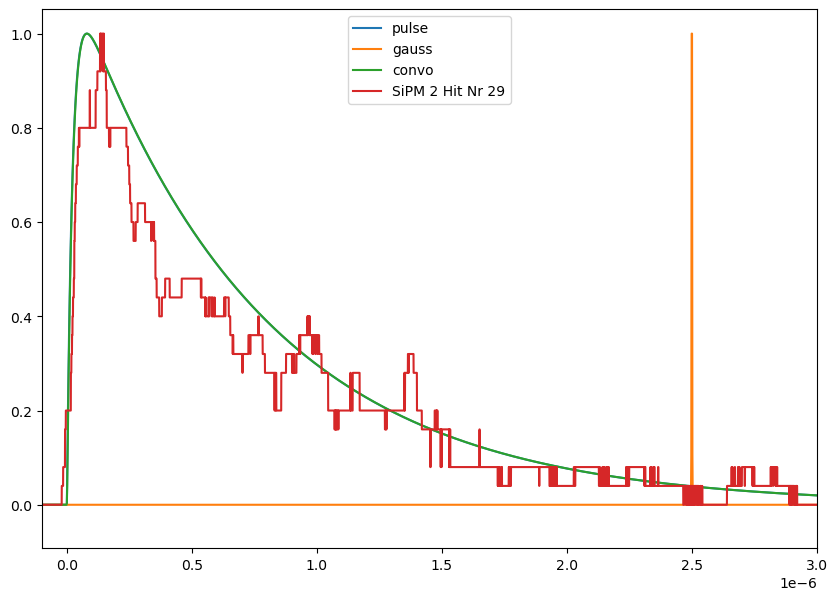

In [36]:
T1 = 0
sig1 = 0
T2 = 0.25e-5
sig2 = 1e-9
t0 = 740e-9
tRC = 22e-9

t = np.linspace(-5e-6, 1e-5, 10000)
#print(t)

plt.figure(figsize=(10,7))
plt.plot(t, h(t, t0, tRC)/max(h(t, t0, tRC)), label = "pulse")
plt.plot(t, x(t, T1, sig1, T2, sig2)/max(x(t, T1, sig1, T2, sig2)), label = "gauss")
plt.plot(t, convo(t, T1, sig1, t0, T2, sig2, tRC)/max(convo(t, T1, sig1, t0, T2, sig2, tRC)), label = "convo")

plt.plot(tbase, si2[ev]/np.max(np.abs(si2[ev])), label = "SiPM 2 Hit Nr " + str(ev))

#print(max(h(t, t0, tRC)))
#print(max(x(t, T1, sig1, T2, sig2)))
#print(max(convo(t, T1, sig1, t0, T2, sig2, tRC)))

plt.xlim(-0.1e-6, 3e-6)
plt.legend()
plt.show()

## Deconvolution (Signal vs. Simulation) Part

### Definition of deconvolution

Applying a z-transform/retransform, the gaussian nature of the particle income is reconstructed while filtering out the specific detector response $h(t) = \mathfrak{Z}^{-1}[H(z)]$.
This means that the recorded pulse $v_0(t) = \mathfrak{Z}^{-1}[V_0(z)]$ can be understood in the z Space as $V_0(z) = X(z) \cdot H(z)$ where $X(z)$ is the gaussian component of drift and light creation, whereas $H(z)$ are the said detector effects (RC shaping and luminescence decay).
After backtransformation, we get the relation for our desired signal
$$X(z) = \frac{V_0(z)}{H(z)} \to x(n) = v_0(n) - \left(e^{-\frac{T_s}{t_0}} + e^{-\frac{T_s}{t_{RC}}}\right)v_0(n-1) + e^{-\frac{T_s^2}{t_0t_{RC}}}v_0(n-2)$$ 

In [37]:
Ts = np.abs(tbase[0]-tbase[1])
print(Ts)

r = 1
print(np.exp(-Ts/t0), np.exp(-Ts/tRC))
def deconv(v0, Ts, t0lit, tRClit):
    roll1 = np.roll(v0, 1*r)
    roll2 = np.roll(v0, 2*r)
    roll1[0:1*r] = 0
    roll2[0:2*r] = 0
    d1 = np.exp(-Ts/t0lit)
    d2 = np.exp(-Ts/tRClit)
    print("v(i) -", round(d1+d2, 2), "* v(i-1) +", round(d1*d2, 2) , "* v(i-2)")
    return v0 - (d1 + d2) * roll1 + d1 * d2 * roll2

def downsampling(evt, dsrate):
    if dsrate == 1:
        evsmooth = evt
    else:
        evsmooth = np.array([int(np.mean(evt[dsrate*i:dsrate*(i+1)])) for i in range(int(len(evt)/dsrate+1))])
    return evsmooth

1.5999999999996967e-10
0.9997838071568254 0.9927536550124678


### Test of Deconvolution Performance

To test the limit at which the deconvolution is working, two convolutional pulses piling up (```simul```) are overlayed with a gaussian sampled noise (```simul2```) of different $\sigma$ and sampled at different frequencies (```Ts```$\in$ {160 ps, 1.6 ns, 16 ns, 260 ns}). It is evident that a higher sampling Time constant ```Ts``` allows for a way worse S/N resolution, meaning of course that a lower timing resolution of the pulse is achieved. 

v(i) - 1.99 * v(i-1) + 0.99 * v(i-2)
v(i) - 1.99 * v(i-1) + 0.99 * v(i-2)
v(i) - 2.0 * v(i-1) + 1.0 * v(i-2)
v(i) - 2.0 * v(i-1) + 1.0 * v(i-2)
v(i) - 1.99 * v(i-1) + 0.99 * v(i-2)
v(i) - 1.99 * v(i-1) + 0.99 * v(i-2)
v(i) - 2.0 * v(i-1) + 1.0 * v(i-2)
v(i) - 2.0 * v(i-1) + 1.0 * v(i-2)
v(i) - 1.99 * v(i-1) + 0.99 * v(i-2)
v(i) - 1.99 * v(i-1) + 0.99 * v(i-2)
v(i) - 2.0 * v(i-1) + 1.0 * v(i-2)
v(i) - 2.0 * v(i-1) + 1.0 * v(i-2)
v(i) - 1.94 * v(i-1) + 0.94 * v(i-2)
v(i) - 1.94 * v(i-1) + 0.94 * v(i-2)
v(i) - 1.96 * v(i-1) + 0.96 * v(i-2)
v(i) - 1.96 * v(i-1) + 0.96 * v(i-2)
v(i) - 1.94 * v(i-1) + 0.94 * v(i-2)
v(i) - 1.94 * v(i-1) + 0.94 * v(i-2)
v(i) - 1.96 * v(i-1) + 0.96 * v(i-2)
v(i) - 1.96 * v(i-1) + 0.96 * v(i-2)
v(i) - 1.94 * v(i-1) + 0.94 * v(i-2)
v(i) - 1.94 * v(i-1) + 0.94 * v(i-2)
v(i) - 1.96 * v(i-1) + 0.96 * v(i-2)
v(i) - 1.96 * v(i-1) + 0.96 * v(i-2)
v(i) - 1.51 * v(i-1) + 0.52 * v(i-2)
v(i) - 1.51 * v(i-1) + 0.52 * v(i-2)
v(i) - 1.63 * v(i-1) + 0.63 * v(i-2)
v(i) - 1.63 *

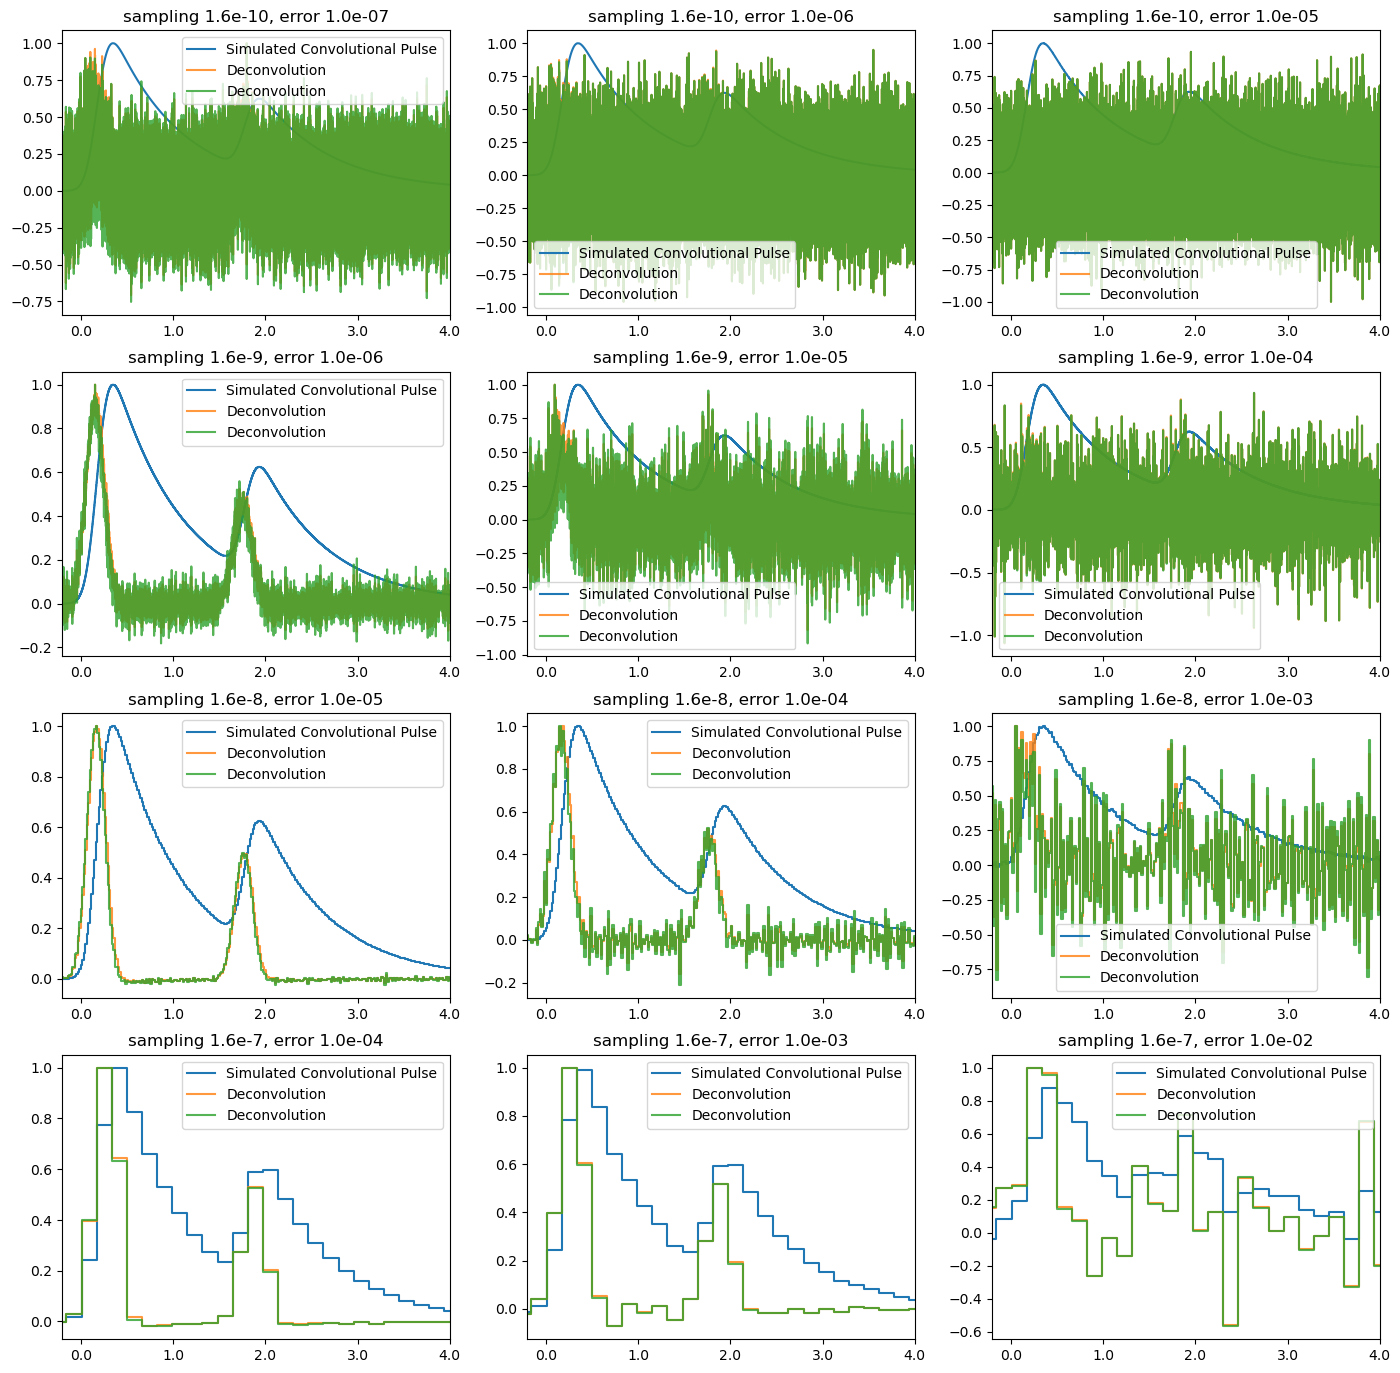

In [39]:
T1 = 0
sig1 = 0
T2 = 20000*Ts#.25e-5
sig2 = 1e-7

#t1 = np.linspace(-2000*Ts, 40000*Ts, 42000)
#t2 = np.linspace(-2000*Ts, 40000*Ts, 4200) 
#t3 = np.linspace(-2000*Ts, 40000*Ts, 420)

plt.figure(figsize = (17, 17))
for i in range(0, 4):
    t1 = np.linspace(-2000*Ts, 40000*Ts, int(42000/10**i))
    simul = convo(t1, T1, sig1, t0, T2, sig2, tRC) + 0.5 * convo(t1, T1+T2*0.5, sig1, t0, T2, sig2, tRC)
    simul = simul / np.max(simul)
    for j in range(0, 3):
        simul2 = simul + np.random.normal(0, np.max(simul)*1e-6 * 10**(j+i), len(simul))
#plt.xlim(0, 1e-7)
#plt.ylim(0.2, 0.21)
#plt.plot(t, h(t, t0, tRC)/max(h(t, t0, tRC)), label = "pulse")
#plt.plot(t, x(t, T1, sig1, T2, sig2)/max(x(t, T1, sig1, T2, sig2)), label = "gauss")
        plt.subplot(4, 3, 3*i + j + 1)
        #print(i, j)
        plt.step(t1, simul2, label = "Simulated Convolutional Pulse")
        plt.step(t1, deconv(simul2, Ts*10**i, t0lit, tRClit)/np.max(deconv(simul2, Ts*10**i,  t0lit, tRClit))*np.max(simul), alpha = 0.6, label = "Deconvolution")
        #plt.step(t1, deconv(simul2, Ts*10**i, t0lit2, tRClit2)/np.max(deconv(simul2, Ts*10**i,  t0lit2, tRClit2))*np.max(simul), alpha = 0.8, label = "Deconvolution")
        plt.xlim(-0.2e-6, 4e-6)
        plt.xticks(np.linspace(0, 4e-6, 5), np.linspace(0, 4, 5))
        plt.title(r"sampling 1.6e" + str(-10+i) + ", error " + str('{:0.1e}'.format(np.max(simul)*1e-7 * 10**(j+i)))) 
        #print(np.max(simul), np.max(deconv(simul2, Ts)))
        plt.legend()
        plt.savefig("sim_hit_convo.png")
plt.show()

### Calculating the "optimal" downsampling

As original the downsampling was proposed out of the fact that often multiple samples maintain the same value, a distribution of the number of samples with the same value is calculated. The mean number of this distribution could give a hint on the downsampling value to choose, evaluating to around 6.9. Based on this number, the downsampling which will be chosen in the next step will be 7, as well as powers of 7 to check for performance in lower sampling frequencies.

6.932295806672818


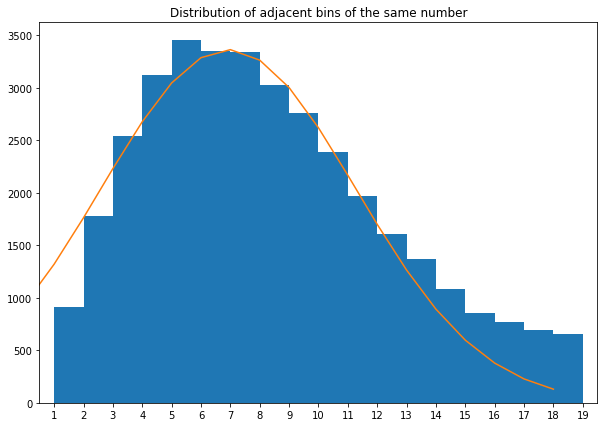

In [7]:
def count_samples(x):
    #print(x[:5])
    y = np.where(x[:-1] != x[1:])[0]
    #print(y[:5])
    z = y[1:] - y[:-1]
    #print(z[:5])
    return z

def gauss(x, A, mu, sigma):
    return A * np.exp(-(x-mu)**2/(sigma))

plt.figure(figsize = (10, 7))
n = 20
vals = count_samples(si2.flatten())
hist = plt.hist(vals[vals < n-1], bins=np.arange(n))
pcount, perr = curve_fit(gauss, hist[1][:-1], hist[0], p0 = (4000, 7, 2))
plt.plot(hist[1][:-1], gauss(hist[1][:-1], *pcount))
#print(np.sum(np.multiply(hist[0],hist[1][:-1])/np.sum(hist[0])))
#plt.hist(count_samples(np.sum(si2, axis = 0)), bins=np.arange(n))
print(pcount[1])
plt.title("Distribution of adjacent bins of the same number")
plt.xticks(np.arange(n), np.arange(n))
plt.xlim(0.5, n-0.5)
#plt.legend()
plt.show()

### Performance for real life signal

Now the same test is performed on measured data: For that, three exemplary pulses are selected and the behaviour of the filter is checked for different downsampling ratios

Event 28, Downsampling to Ts*6
v(i) - 1.96 * v(i-1) + 0.96 * v(i-2)
Event 28, Downsampling to Ts*36
v(i) - 1.79 * v(i-1) + 0.79 * v(i-2)
Event 28, Downsampling to Ts*216
v(i) - 1.21 * v(i-1) + 0.25 * v(i-2)
Event 29, Downsampling to Ts*6
v(i) - 1.96 * v(i-1) + 0.96 * v(i-2)
Event 29, Downsampling to Ts*36
v(i) - 1.79 * v(i-1) + 0.79 * v(i-2)
Event 29, Downsampling to Ts*216
v(i) - 1.21 * v(i-1) + 0.25 * v(i-2)
Event 30, Downsampling to Ts*6
v(i) - 1.96 * v(i-1) + 0.96 * v(i-2)
Event 30, Downsampling to Ts*36
v(i) - 1.79 * v(i-1) + 0.79 * v(i-2)
Event 30, Downsampling to Ts*216
v(i) - 1.21 * v(i-1) + 0.25 * v(i-2)
Event 31, Downsampling to Ts*6
v(i) - 1.96 * v(i-1) + 0.96 * v(i-2)
Event 31, Downsampling to Ts*36
v(i) - 1.79 * v(i-1) + 0.79 * v(i-2)
Event 31, Downsampling to Ts*216
v(i) - 1.21 * v(i-1) + 0.25 * v(i-2)
Event 32, Downsampling to Ts*6
v(i) - 1.96 * v(i-1) + 0.96 * v(i-2)
Event 32, Downsampling to Ts*36
v(i) - 1.79 * v(i-1) + 0.79 * v(i-2)
Event 32, Downsampling to Ts*216
v(

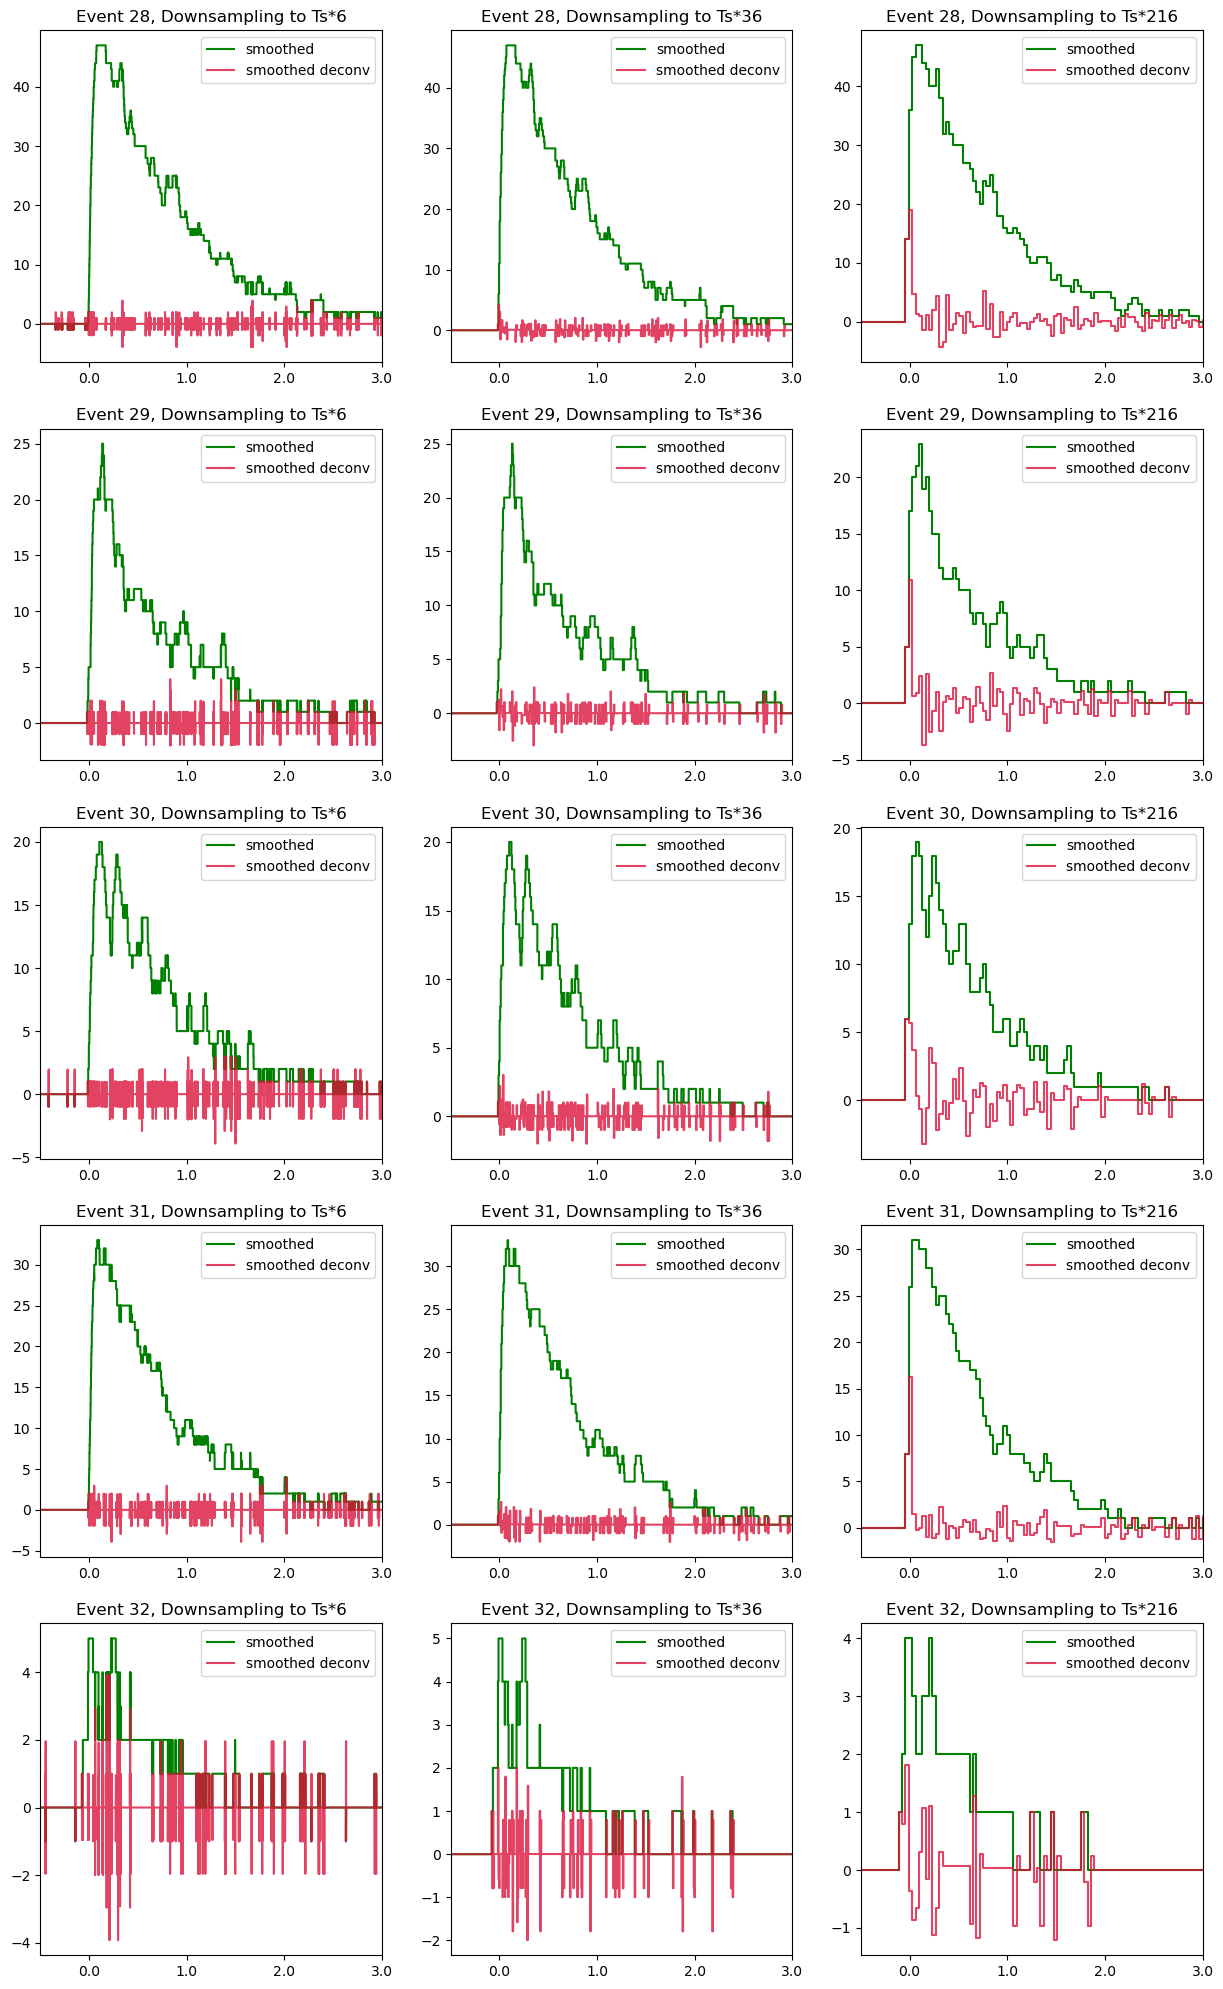

In [43]:
#ev = 4
evstart = 28
evnum = 5
plt.figure(figsize=(15, 5*evnum))
#print(np.exp(-Ts*downsampling/t0), np.exp(-Ts*downsampling/tRC))
for ev in range(evstart, evstart+evnum):
#plt.subplot(211)
#plt.plot(tbase, si2[ev]/np.max(np.abs(si2[ev])), label = "SiPM 2 Hit Nr " + str(ev))
#plt.plot(tbase, deconv(si2[ev], Ts)/np.max(np.abs(deconv(si2[ev], Ts)))*0.2, alpha = 0.5, label = "Deconv Signal (scaled for visibility)")
#plt.subplot(212)
    for j in range(1, 4):
        dsrate = 6**j
        tbase2 = tbase[::dsrate]
        ax = plt.subplot(evnum, 3, 3 * (ev-evstart) + j)
        evsmooth = downsampling(si2[ev], dsrate)
        ax.step(tbase2, evsmooth, color = "green", label = "smoothed")
        #ax.step(tbase2, evsmooth/np.max(np.abs(evsmooth)), label = "smoothed")
#plt.plot(tbase, si2[ev]/np.max(np.abs(si2[ev])), label = "SiPM 2 Hit Nr " + str(ev))
        plt.xlim(-0.5e-6, 3e-6)
        plt.xticks(np.linspace(0, 3e-6, 4), np.linspace(0, 3, 4))
        plt.title("Event "+ str(ev)+ ", Downsampling to Ts*"+ str(dsrate))
        print("Event "+ str(ev)+ ", Downsampling to Ts*"+ str(dsrate))
        #ax2 = ax.twinx()
        ax.step(tbase2, deconv(evsmooth, Ts*dsrate, t0lit, tRClit), color = "crimson", alpha = 0.8, label = "smoothed deconv")
        #ax2.step(tbase2, deconv(evsmooth, Ts*dsrate)/np.max(np.abs(deconv(evsmooth, Ts*dsrate))), alpha = 0.8, label = "smoothed deconv")
        #print(np.max(deconv(evsmooth, Ts*downsampling)))
        #align_yaxis(ax, 0, ax2, 0)
        plt.legend()
        plt.savefig("real_hit_7sq.png")
plt.show()

Event 12, Downsampling to Ts*7
v(i) - 1.95 * v(i-1) + 0.95 * v(i-2)
Event 12, Downsampling to Ts*21
v(i) - 1.86 * v(i-1) + 0.86 * v(i-2)
Event 12, Downsampling to Ts*35
v(i) - 1.78 * v(i-1) + 0.78 * v(i-2)
Event 13, Downsampling to Ts*7
v(i) - 1.95 * v(i-1) + 0.95 * v(i-2)
Event 13, Downsampling to Ts*21
v(i) - 1.86 * v(i-1) + 0.86 * v(i-2)
Event 13, Downsampling to Ts*35
v(i) - 1.78 * v(i-1) + 0.78 * v(i-2)
Event 14, Downsampling to Ts*7
v(i) - 1.95 * v(i-1) + 0.95 * v(i-2)
Event 14, Downsampling to Ts*21
v(i) - 1.86 * v(i-1) + 0.86 * v(i-2)
Event 14, Downsampling to Ts*35
v(i) - 1.78 * v(i-1) + 0.78 * v(i-2)
Event 15, Downsampling to Ts*7
v(i) - 1.95 * v(i-1) + 0.95 * v(i-2)
Event 15, Downsampling to Ts*21
v(i) - 1.86 * v(i-1) + 0.86 * v(i-2)
Event 15, Downsampling to Ts*35
v(i) - 1.78 * v(i-1) + 0.78 * v(i-2)
Event 16, Downsampling to Ts*7
v(i) - 1.95 * v(i-1) + 0.95 * v(i-2)
Event 16, Downsampling to Ts*21
v(i) - 1.86 * v(i-1) + 0.86 * v(i-2)
Event 16, Downsampling to Ts*35
v(i) - 

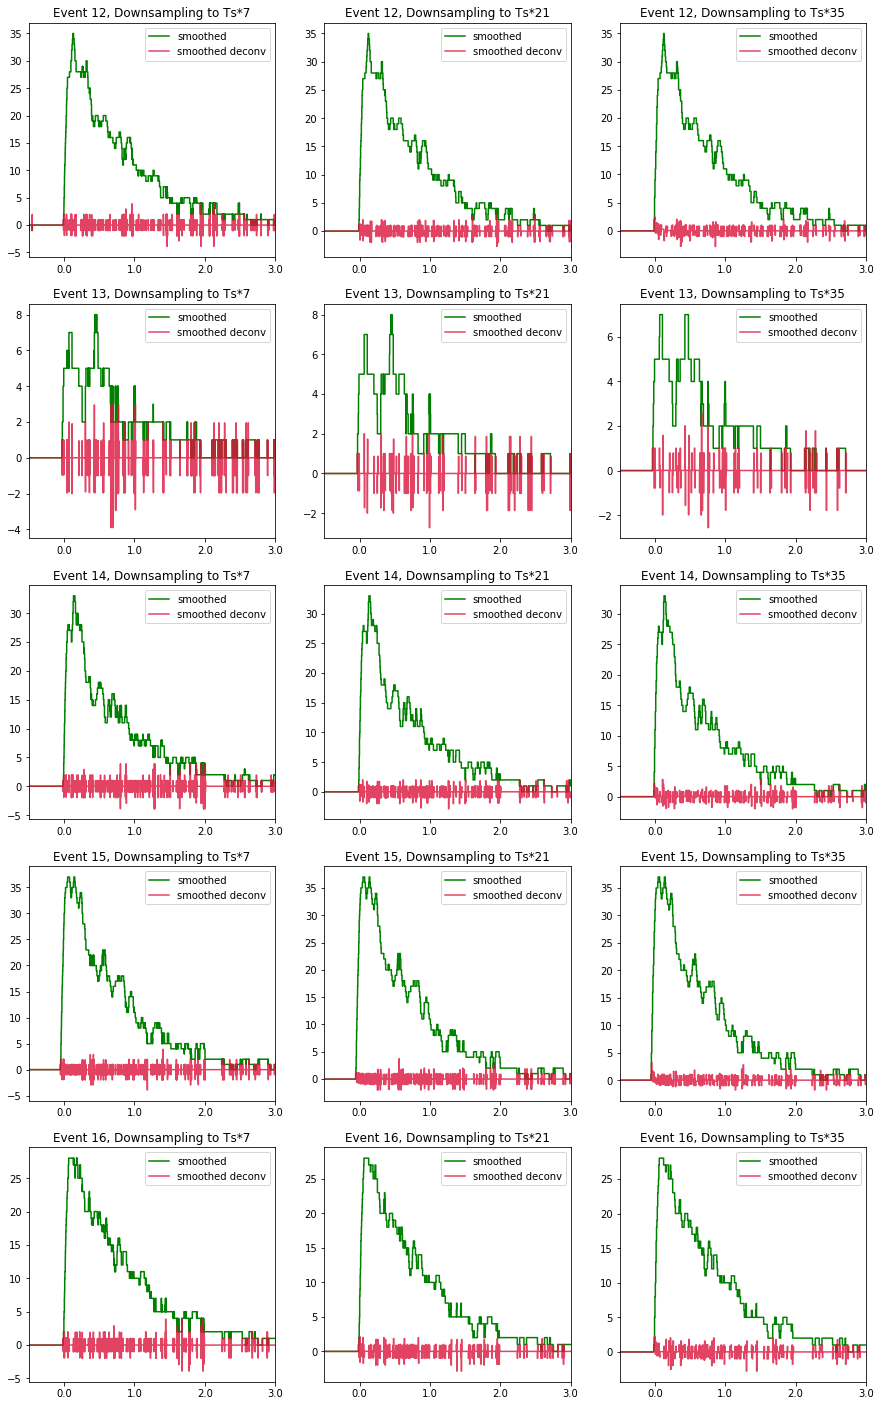

In [9]:
#ev = 4
evstart = 12
evnum = 5
plt.figure(figsize=(15, 5*evnum))
#print(np.exp(-Ts*downsampling/t0), np.exp(-Ts*downsampling/tRC))
for ev in range(evstart, evstart+evnum):
#plt.subplot(211)
#plt.plot(tbase, si2[ev]/np.max(np.abs(si2[ev])), label = "SiPM 2 Hit Nr " + str(ev))
#plt.plot(tbase, deconv(si2[ev], Ts)/np.max(np.abs(deconv(si2[ev], Ts)))*0.2, alpha = 0.5, label = "Deconv Signal (scaled for visibility)")
#plt.subplot(212)
    for j in range(1, 4):
        dsrate = 7+14*(j-1)
        tbase2 = tbase[::dsrate]
        ax = plt.subplot(evnum, 3, 3 * (ev-evstart) + j)
        evsmooth = downsampling(si2[ev], dsrate)
        ax.step(tbase2, evsmooth, color = "green", label = "smoothed")
        #ax.step(tbase2, evsmooth/np.max(np.abs(evsmooth)), label = "smoothed")
#plt.plot(tbase, si2[ev]/np.max(np.abs(si2[ev])), label = "SiPM 2 Hit Nr " + str(ev))
        plt.xlim(-0.5e-6, 3e-6)
        plt.xticks(np.linspace(0, 3e-6, 4), np.linspace(0, 3, 4))
        plt.title("Event "+ str(ev)+ ", Downsampling to Ts*"+ str(dsrate))
        print("Event "+ str(ev)+ ", Downsampling to Ts*"+ str(dsrate))
        #ax2 = ax.twinx()
        ax.step(tbase2, deconv(evsmooth, Ts*dsrate), color = "crimson", alpha = 0.8, label = "smoothed deconv")
        #ax2.step(tbase2, deconv(evsmooth, Ts*dsrate)/np.max(np.abs(deconv(evsmooth, Ts*dsrate))), alpha = 0.8, label = "smoothed deconv")
        #print(np.max(deconv(evsmooth, Ts*downsampling)))
        #align_yaxis(ax, 0, ax2, 0)
        plt.legend()
        plt.savefig("real_hit_7mult.png")
plt.show()